In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
import seaborn as sns

In [2]:
print(f"Tensorflow Version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")

Tensorflow Version: 2.3.1
Keras Version: 2.4.0


### A simple classifier model using Keras Sequential API

**MNIST Dataset**

- Contains handwritten digits
- 10 classes: digits 0 - 9
- Each datapoint is a 2D arrat of 28x28 pixels

In [3]:
# Loading mnist data using keras

mnist = tf.keras.datasets.mnist

(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()

In [4]:
print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
# Creating validation dataset from training data

X_valid, X_train = Xtrain[:6000], Xtrain[6000:]
y_valid, y_train = ytrain[:6000], ytrain[6000:]

In [6]:
# Scaling the data between 0 and 1 since each pixel ranges from 0 - 255

X_valid, X_train = X_valid/255., X_train/255.

Xtest = Xtest/255.

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(54000, 28, 28)
(54000,)
(6000, 28, 28)
(6000,)


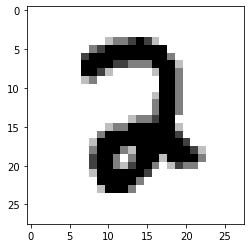

In [8]:
# Visualizing the datapoint

plt.imshow(X_train[8050], cmap='binary')
plt.show()

<AxesSubplot:>

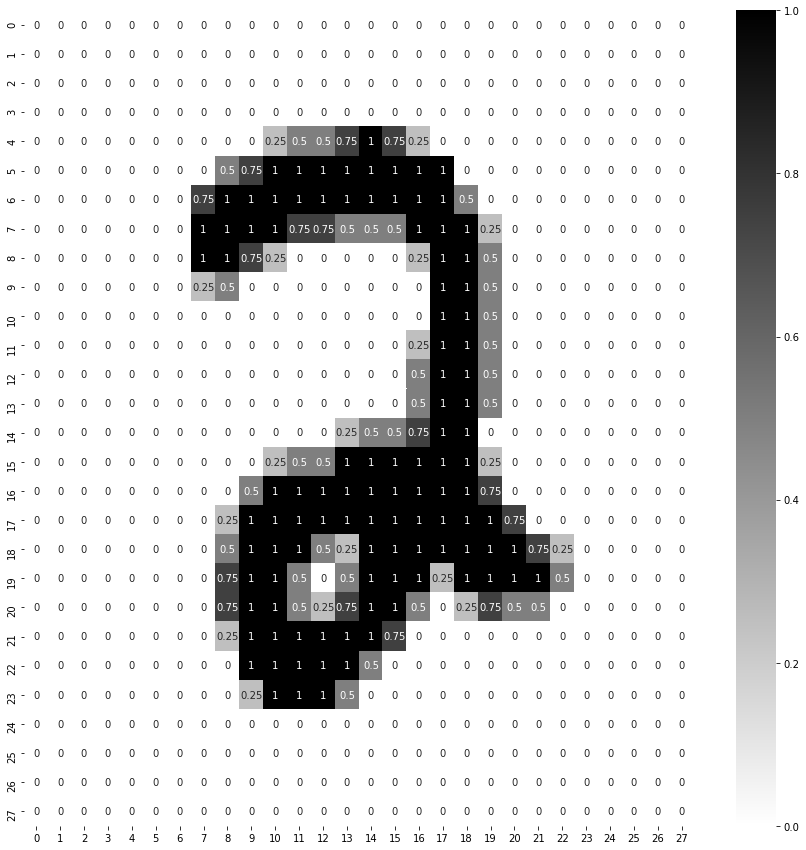

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[8050], annot=True, cmap="binary")

### Building a Sequential model

In [18]:
sq_model = tf.keras.models.Sequential()

sq_model.add(tf.keras.layers.Flatten(input_shape=[28,28], name='inputlayer'))
sq_model.add(tf.keras.layers.Dense(400, activation='relu', name='hiddenlayer1'))
sq_model.add(tf.keras.layers.Dense(200, activation='relu', name='hiddenlayer2'))
sq_model.add(tf.keras.layers.Dense(100, activation='relu', name='hiddenlayer3'))
sq_model.add(tf.keras.layers.Dense(10, activation='softmax', name='outputlayer'))

In [19]:
sq_model.summary() #summary of all the trainable parameters -> weights and biases

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputlayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenlayer1 (Dense)         (None, 400)               314000    
_________________________________________________________________
hiddenlayer2 (Dense)         (None, 200)               80200     
_________________________________________________________________
hiddenlayer3 (Dense)         (None, 100)               20100     
_________________________________________________________________
outputlayer (Dense)          (None, 10)                1010      
Total params: 415,310
Trainable params: 415,310
Non-trainable params: 0
_________________________________________________________________


### Assigning loss function, optimizers, metrics

In [20]:
loss_func = 'sparse_categorical_crossentropy'
optimizer_func = 'SGD'
metr = ['accuracy']

sq_model.compile(optimizer = optimizer_func,
                loss = loss_func,
                metrics = metr)

### Fitting the model

In [21]:
EPOCHS = 25

trained_model = sq_model.fit(X_train,
                            y_train,
                            epochs=EPOCHS,
                            validation_data=(X_valid,y_valid))

Epoch 1/25
1688/1688 [==============================] - 3s 2ms/step - loss: 0.6080 - accuracy: 0.8407 - val_loss: 0.2864 - val_accuracy: 0.9163
Epoch 2/25
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2542 - accuracy: 0.9273 - val_loss: 0.2082 - val_accuracy: 0.9420
Epoch 3/25
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1975 - accuracy: 0.9434 - val_loss: 0.1854 - val_accuracy: 0.9468
Epoch 4/25
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1629 - accuracy: 0.9531 - val_loss: 0.1479 - val_accuracy: 0.9578
Epoch 5/25
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1380 - accuracy: 0.9605 - val_loss: 0.1383 - val_accuracy: 0.9628
Epoch 6/25
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1186 - accuracy: 0.9655 - val_loss: 0.1205 - val_accuracy: 0.9658
Epoch 7/25
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1034 - accuracy: 0.9704 - val_loss: 0.1102 - val_accuracy:

In [22]:
trained_model.history #get a summary of all loss and accuracy for each epoch

{'loss': [0.6079985499382019,
  0.25420376658439636,
  0.19746211171150208,
  0.16291199624538422,
  0.1379787176847458,
  0.11862653493881226,
  0.10340409725904465,
  0.09098546206951141,
  0.08016727864742279,
  0.07222916930913925,
  0.06429673731327057,
  0.05800734832882881,
  0.05169105529785156,
  0.04681633785367012,
  0.04179232567548752,
  0.03732921928167343,
  0.03405359014868736,
  0.03051646798849106,
  0.027553807944059372,
  0.02454265020787716,
  0.021919673308730125,
  0.019853316247463226,
  0.01804816536605358,
  0.01622551865875721,
  0.014493398368358612],
 'accuracy': [0.840666651725769,
  0.9272962808609009,
  0.9434259533882141,
  0.9530555605888367,
  0.9605000019073486,
  0.965499997138977,
  0.9703888893127441,
  0.9737777709960938,
  0.9767962694168091,
  0.9793888926506042,
  0.9811851978302002,
  0.9836666584014893,
  0.9850370287895203,
  0.9868888854980469,
  0.9884629845619202,
  0.9902036786079407,
  0.9909259080886841,
  0.9923148155212402,
  0.9928

In [23]:
# converting to a dataframe
pd.DataFrame(trained_model.history)

,loss,accuracy,val_loss,val_accuracy
0,0.607999,0.840667,0.286434,0.916333
1,0.254204,0.927296,0.208180,0.942000
2,0.197462,0.943426,0.185364,0.946833
3,0.162912,0.953056,0.147858,0.957833
4,0.137979,0.960500,0.138294,0.962833
5,0.118627,0.965500,0.120492,0.965833
6,0.103404,0.970389,0.110219,0.968167
7,0.090985,0.973778,0.105161,0.969667
8,0.080167,0.976796,0.096057,0.971333
9,0.072229,0.979389,0.089296,0.972333


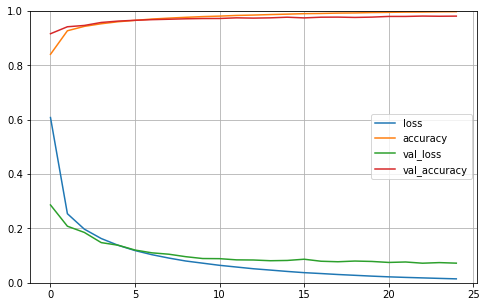

In [24]:
# visualizing the dataframe

pd.DataFrame(trained_model.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Model evaluation

In [56]:
sq_model.evaluate(X_train, y_train)

1688/1688 [==============================] - 1s 614us/step - loss: 0.0122 - accuracy: 0.9984


[0.012183035723865032, 0.9984074234962463]

In [25]:
sq_model.evaluate(Xtest, ytest)

313/313 [==============================] - 0s 647us/step - loss: 0.0679 - accuracy: 0.9808


[0.06792689859867096, 0.9807999730110168]

In [55]:
X_new = Xtest[4500:4510]
X_new

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [53]:
y_proba = sq_model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.09, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.91],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.24, 0.  , 0.  , 0.  , 0.  , 0.76, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.94, 0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.03, 0.  , 0.  , 0.  , 0.  , 0.97, 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [50]:
y_pred = np.argmax(y_proba,axis=1)

y_pred

array([9, 3, 9, 2, 7, 9, 2, 1, 8, 3])

In [51]:
ytest_new = ytest[4500:4510]

ytest_new

array([9, 3, 9, 2, 2, 9, 2, 1, 8, 3], dtype=uint8)

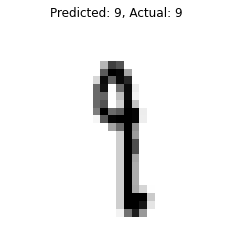

------------------------------------------------------------


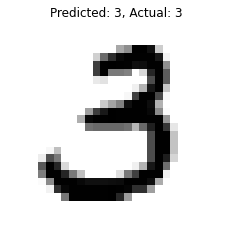

------------------------------------------------------------


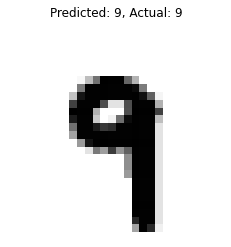

------------------------------------------------------------


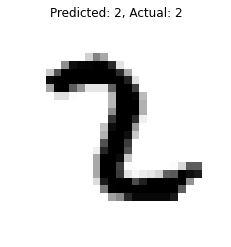

------------------------------------------------------------


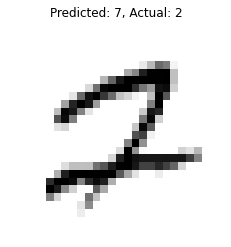

------------------------------------------------------------


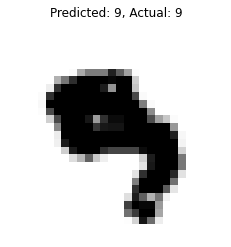

------------------------------------------------------------


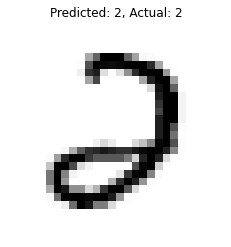

------------------------------------------------------------


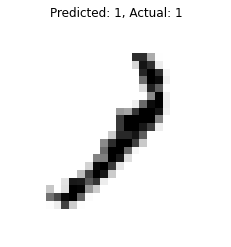

------------------------------------------------------------


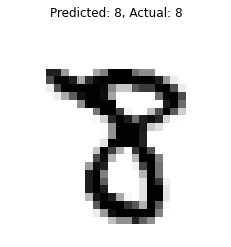

------------------------------------------------------------


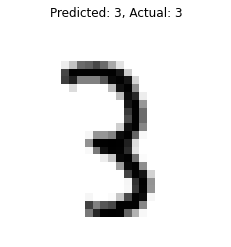

------------------------------------------------------------


In [54]:
for data, pred, actual in zip(X_new, y_pred, ytest_new):
    plt.imshow(data, cmap="binary")
    plt.title(f"Predicted: {pred}, Actual: {actual}")
    plt.axis('off')
    plt.show()
    print("---"*20)